In [1]:
import pandas as pd
import colorama as col

import matplotlib.pyplot as plt

df = pd.read_csv("./Test Report.csv")

In [2]:
def print_red(s):
    print(col.Fore.RED + s + col.Fore.RESET)

def print_green(s):
    print(col.Fore.GREEN + s + col.Fore.RESET)

In [3]:
def check_tests_status():
    number_of_tests = df.shape[0]
    number_of_tests_passed = df['Status'].value_counts()['Yes']

    if 'No' not in df['Status'].value_counts():
        number_of_tests_failed = 0
    else:
        number_of_tests_failed = df['Status'].value_counts()['No']

    if number_of_tests_passed + number_of_tests_failed != number_of_tests:
        print_red("Error: Number of tests passed and failed does not equal total number of tests")
    else:
        print("Number of tests: ", number_of_tests)
        print_green("Tests passing: " + str(number_of_tests_passed))
        print_red("Tests failing: " + str(number_of_tests_failed))

check_tests_status()


Number of tests:  55
Tests passing: 55
Tests failing: 0


In [4]:
# Priority list of failed tests based on importance level

def list_failed_tests_priority():
    failed_tests = df[df['Status'] == 'No']
    failed_tests = failed_tests.sort_values(by=['Severity'])
    failed_tests = failed_tests.iloc[::-1]
    if failed_tests.empty:
        print_green("No failed tests")
    else:
        for index, row in failed_tests.iterrows():
            print("number: ", row['Bug ID'])
            print("Importance level: ", row['Severity'])
            print("Type of issue: ", row['Bug Description'])
            print("Steps to reproduce: ", row['Steps to reproduce'])
            print("Actual result: ", row['Actual result'])
            print("Expected result: ", row['Expected result'])
            print("How to fix: ", row['How to fix(if known)'])
            print("")

list_failed_tests_priority()

No failed tests


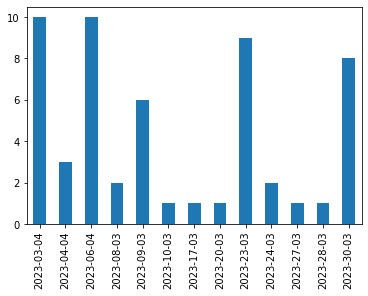

In [5]:
# Graph of all the dates were bugs were discovered

def graph_dates():
    dates = df['Date of discovery'].value_counts()
    dates = dates.sort_index()
    dates.plot(kind='bar')
    plt.show()

graph_dates()

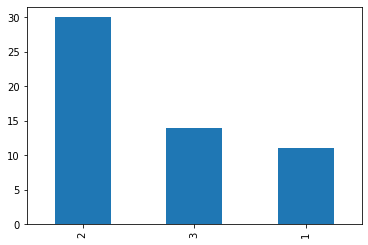

In [6]:
# Graph of all the bugs based on their importance level

def graph_importance():
    importance = df['Severity'].value_counts()
    importance.plot(kind='bar')
    plt.show()

graph_importance()